# Analýza shlukování dat

In [2]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

In [4]:
df = pd.read_csv('tmdb_movie_data.csv', sep=',')

## Přehled o datech

In [5]:
with pd.option_context('display.max_columns', None):
    display(df)

,id,title,release_date,vote_average,vote_count,popularity,budget,revenue,runtime,genres,spoken_languages
0,507244,Afterburn,2025-08-20,6.300,55,371.9555,60000000.0,184758.0,105.0,"Science Fiction, Action, Comedy",English
1,1156594,Our Fault,2025-10-15,7.644,418,348.6793,0.0,0.0,112.0,"Romance, Drama",Spanish
2,755898,War of the Worlds,2025-07-29,4.300,658,309.7779,0.0,0.0,91.0,"Science Fiction, Thriller",English
3,1305717,Hunting Grounds,2025-05-16,6.190,42,308.3399,0.0,0.0,89.0,"Action, Thriller",English
4,1306525,The Elixir,2025-10-22,5.570,65,268.1553,0.0,0.0,118.0,"Horror, Thriller","Indonesian, Javanese"
...,...,...,...,...,...,...,...,...,...,...,...
8699,259706,Cobra Mission 2,1989-02-09,2.000,2,4.8403,0.0,0.0,100.0,"Action, Drama, War, Adventure",NaN
8700,683127,Earwig and the Witch,2021-02-03,5.900,278,4.9149,0.0,842744.0,83.0,"Animation, Fantasy, Family",Japanese
8701,513970,The Clown,2007-08-01,5.500,2,5.0256,0.0,0.0,90.0,"Action, Drama",Arabic
8702,550543,True Miracle,2007-07-16,5.800,4,7.8917,0.0,0.0,107.0,"Mystery, Drama, Romance",Croatian


In [7]:
# Strukture and types
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8704 entries, 0 to 8703
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8704 non-null   int64  
 1   title             8704 non-null   object 
 2   release_date      8609 non-null   object 
 3   vote_average      8704 non-null   float64
 4   vote_count        8704 non-null   int64  
 5   popularity        8704 non-null   float64
 6   budget            8484 non-null   float64
 7   revenue           8484 non-null   float64
 8   runtime           8484 non-null   float64
 9   genres            7966 non-null   object 
 10  spoken_languages  7846 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 748.1+ KB


,id,vote_average,vote_count,popularity,budget,revenue,runtime
count,8.704000e+03,8704.000000,8704.00000,8704.000000,8.484000e+03,8.484000e+03,8484.000000
mean,4.671657e+05,4.982943,1539.16682,9.244325,1.738765e+07,5.882330e+07,92.333569
std,4.467562e+05,2.791266,3576.71004,12.822224,4.133176e+07,1.692702e+08,41.455634
min,8.000000e+00,0.000000,0.00000,3.288100,0.000000e+00,0.000000e+00,0.000000
25%,5.513225e+04,3.833000,1.00000,6.286850,0.000000e+00,0.000000e+00,81.000000
50%,3.482170e+05,6.090500,30.00000,7.376550,0.000000e+00,0.000000e+00,97.000000
75%,7.768900e+05,6.950250,1278.50000,8.929875,1.200000e+07,2.578153e+07,114.000000
max,1.566841e+06,10.000000,38129.00000,371.955500,4.000000e+08,2.923706e+09,840.000000


In [8]:
df.head()

,id,title,release_date,vote_average,vote_count,popularity,budget,revenue,runtime,genres,spoken_languages
0,507244,Afterburn,2025-08-20,6.300,55,371.9555,60000000.0,184758.0,105.0,"Science Fiction, Action, Comedy",English
1,1156594,Our Fault,2025-10-15,7.644,418,348.6793,0.0,0.0,112.0,"Romance, Drama",Spanish
2,755898,War of the Worlds,2025-07-29,4.300,658,309.7779,0.0,0.0,91.0,"Science Fiction, Thriller",English
3,1305717,Hunting Grounds,2025-05-16,6.190,42,308.3399,0.0,0.0,89.0,"Action, Thriller",English
4,1306525,The Elixir,2025-10-22,5.570,65,268.1553,0.0,0.0,118.0,"Horror, Thriller","Indonesian, Javanese"


In [9]:
# Missing values
df.isna().sum()

,0
id,0
title,0
release_date,95
vote_average,0
vote_count,0
popularity,0
budget,220
revenue,220
runtime,220
genres,738


## Úprava dat

In [10]:
# Převod release_date na datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Rok a měsíc premiéry
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

# ROI (návratnost)
df['roi'] = np.where(df['budget'] > 0, df['revenue'] / df['budget'], np.nan)

display(df)

,id,title,release_date,vote_average,vote_count,popularity,budget,revenue,runtime,genres,spoken_languages,release_year,release_month,roi
0,507244,Afterburn,2025-08-20,6.300,55,371.9555,60000000.0,184758.0,105.0,"Science Fiction, Action, Comedy",English,2025.0,8.0,0.003079
1,1156594,Our Fault,2025-10-15,7.644,418,348.6793,0.0,0.0,112.0,"Romance, Drama",Spanish,2025.0,10.0,NaN
2,755898,War of the Worlds,2025-07-29,4.300,658,309.7779,0.0,0.0,91.0,"Science Fiction, Thriller",English,2025.0,7.0,NaN
3,1305717,Hunting Grounds,2025-05-16,6.190,42,308.3399,0.0,0.0,89.0,"Action, Thriller",English,2025.0,5.0,NaN
4,1306525,The Elixir,2025-10-22,5.570,65,268.1553,0.0,0.0,118.0,"Horror, Thriller","Indonesian, Javanese",2025.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,259706,Cobra Mission 2,1989-02-09,2.000,2,4.8403,0.0,0.0,100.0,"Action, Drama, War, Adventure",NaN,1989.0,2.0,NaN
8700,683127,Earwig and the Witch,2021-02-03,5.900,278,4.9149,0.0,842744.0,83.0,"Animation, Fantasy, Family",Japanese,2021.0,2.0,NaN
8701,513970,The Clown,2007-08-01,5.500,2,5.0256,0.0,0.0,90.0,"Action, Drama",Arabic,2007.0,8.0,NaN
8702,550543,True Miracle,2007-07-16,5.800,4,7.8917,0.0,0.0,107.0,"Mystery, Drama, Romance",Croatian,2007.0,7.0,NaN


## Jednoduché vizualizace číselných proměnných

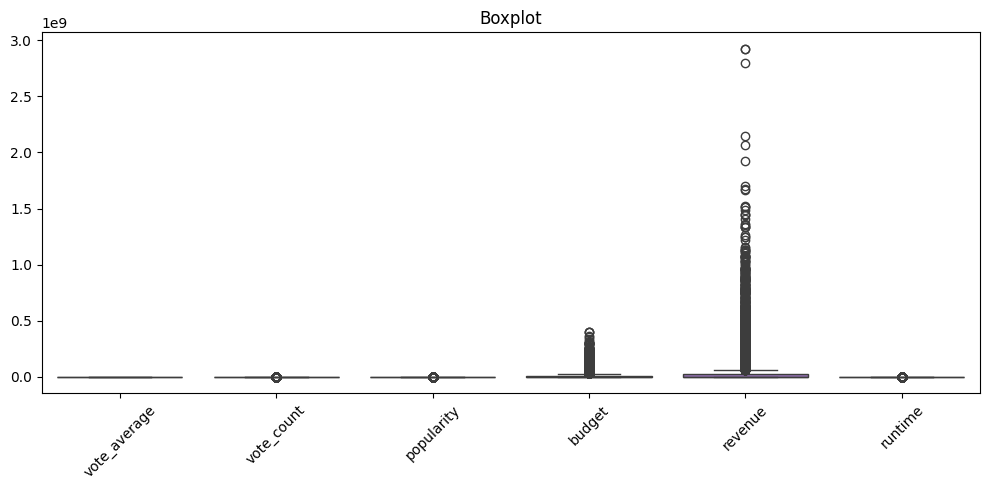

In [11]:
numeric_cols = ['vote_average', 'vote_count', 'popularity', 'budget', 'revenue', 'runtime']

sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot')
plt.show()

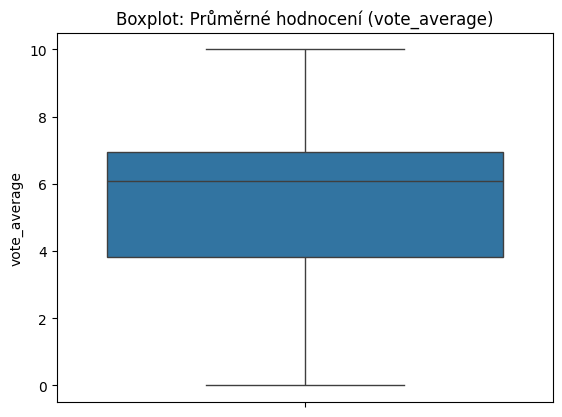

In [29]:
sns.boxplot(y=df['vote_average'])
plt.title('Boxplot: Průměrné hodnocení (vote_average)')
plt.ylabel('vote_average')
plt.show()

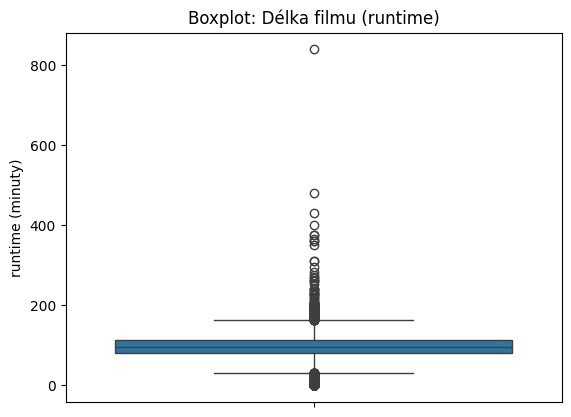

In [30]:
sns.boxplot(y=df['runtime'])
plt.title('Boxplot: Délka filmu (runtime)')
plt.ylabel('runtime (minuty)')
plt.show()

Průměrné hodnocení podle roku

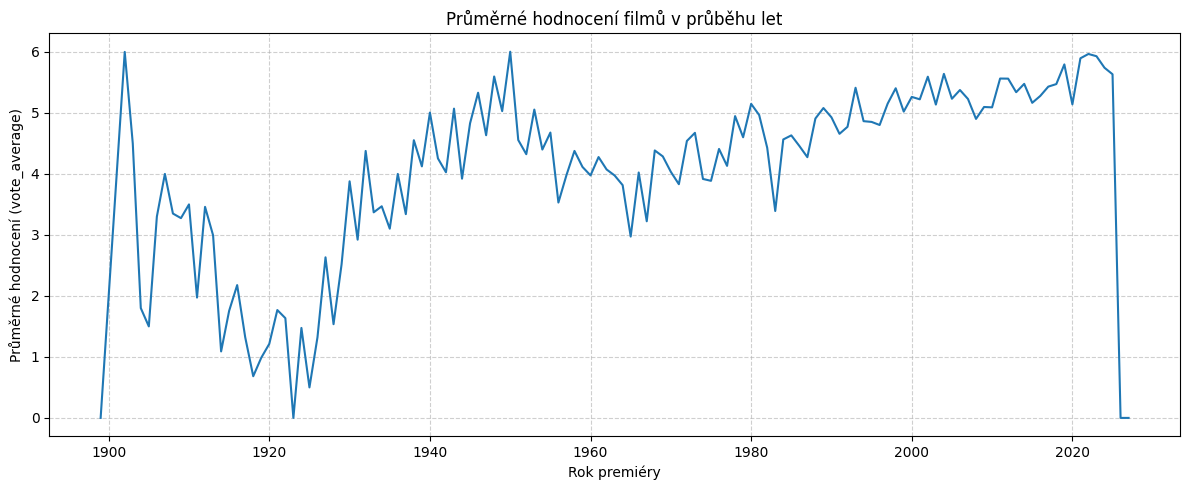

In [12]:
avg_rating_by_year = df.groupby('release_year')['vote_average'].mean().reset_index()
sns.lineplot(data=avg_rating_by_year, x='release_year', y='vote_average')
plt.title('Průměrné hodnocení filmů v průběhu let')
plt.ylabel('Průměrné hodnocení (vote_average)')
plt.xlabel('Rok premiéry')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Před rokem 1950 je křivka extrémně rozkolísaná. Tato nestabilita je pravděpodobně způsobena malým počtem filmů vydaných v těchto letech (a tedy i malým počtem hlasů), což činí průměr vysoce citlivým na hodnocení jednoho nebo dvou filmů.

Křivka stává podstatně stabilnější a méně volatilní po roce 1950. Průměrné hodnocení se po zbytek 20. a 21. století pohybuje v relativně úzkém pásmu, většinou mezi 4.5 a 6.0. Celkově se průměrné hodnocení drží na stabilní úrovni s mírnými periodami růstu a poklesu. Nelze pozorovat dramatický dlouhodobý trend, který by naznačoval, že by se celková kvalita filmů v průměru výrazně zlepšovala nebo zhoršovala.

Top 10 filmů dle popularity

/tmp/ipython-input-1585466724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_10_pop, x='title', y='popularity', palette='viridis')


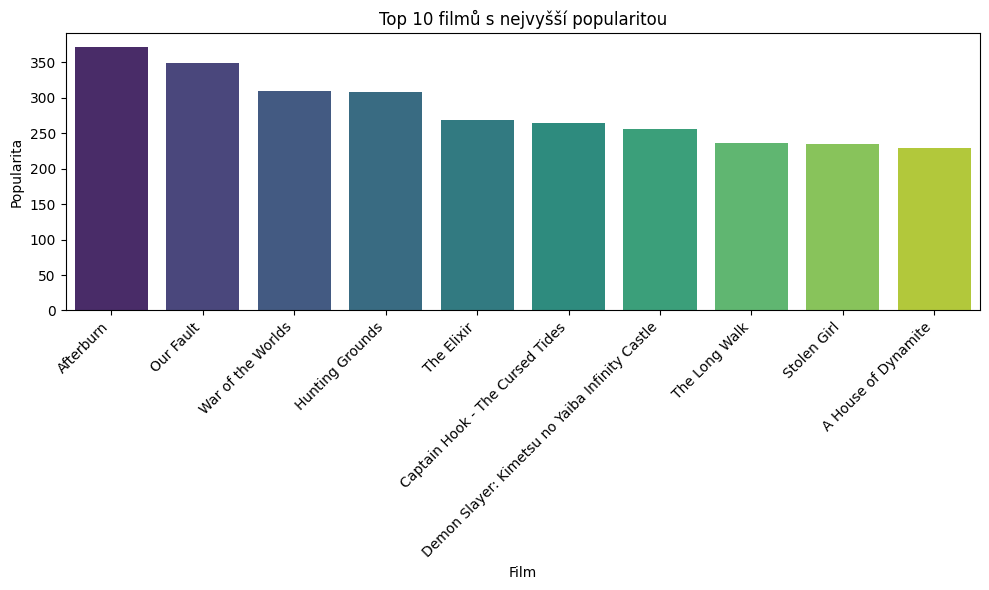

In [13]:
df_top_10_pop = df.sort_values(by='popularity', ascending=False).head(10)
sns.barplot(data=df_top_10_pop, x='title', y='popularity', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 filmů s nejvyšší popularitou')
plt.ylabel('Popularita')
plt.xlabel('Film')
plt.show()

## Vztahy mezi proměnnými (korelace, scatterploty)

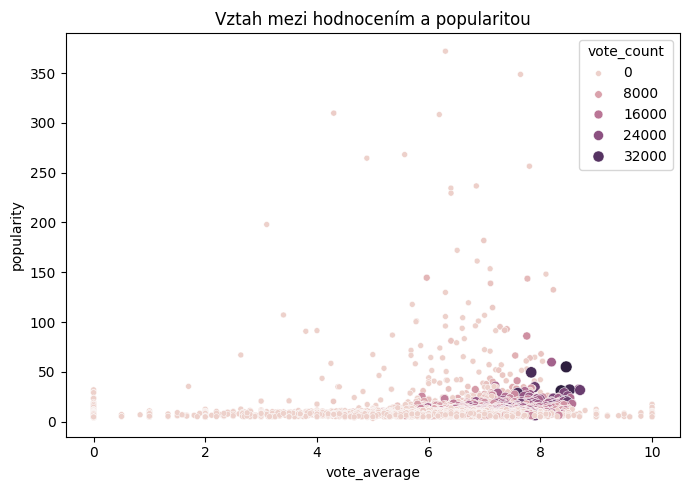

In [15]:
sns.scatterplot(data=df, x='vote_average', y='popularity', size='vote_count', hue='vote_count', legend='brief')
plt.title('Vztah mezi hodnocením a popularitou')
plt.xlabel('vote_average')
plt.ylabel('popularity')
plt.show()

Body s nejvyšším počtem hlasů (tmavě fialové/černé) se koncentrují v oblasti s vysokým hodnocením (7.5–8.5) a střední popularitou (25–50). Na základě toho lze říct, že filmy, o kterých se nejvíce hlasuje, jsou ty nejznámější a zároveň si udržují vysokou kvalitu. Tyto body tedy představují nejdůvěryhodnější data o hodnocení.

Naopak filmy s velmi vysokou popularitou a nízkým počtem hlasů mohou mít hodnocení, které je méně statisticky významné.

Při pohled na graf je možné říct, že lidé mají tendenci častěji a spolehlivěji hodnotit kvalitnější filmy. (Největší hlasovací aktivita se točí kolem kvalitního obsahu.)

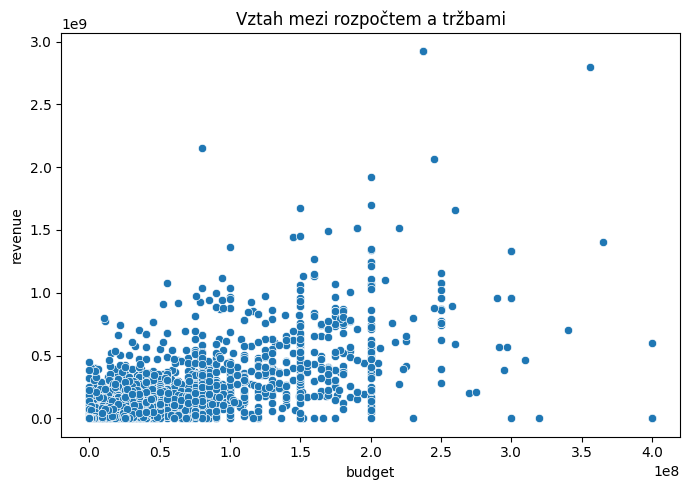

In [16]:
sns.scatterplot(data=df, x='budget', y='revenue')
plt.title('Vztah mezi rozpočtem a tržbami')
plt.xlabel('budget')
plt.ylabel('revenue')
plt.show()

Graf ukazuje slabou pozitivní korelaci mezi rozpočtem a tržbami.
Obecně platí, že s rostoucím rozpočtem (osa X) mají filmy tendenci dosahovat vyšších tržeb (osa Y). Lze předpokládat, že investice do dražších produkcí se vyplácí, ale body jsou široce rozptýlené, což naznačuje, že rozpočet je jen jedním z mnoha faktorů ovlivňujících tržby.

Existují i filmy s velkým rozpočtem a nízkými tržbami, což signalizuje komerční propadáky.
Naopak tomu některé filmy s nízkým až středním rozpočtem dosáhly relativně vysokých tržeb, což značí extrémně úspěšné a efektivní investice.

## Analýza žánrů

In [24]:
df['genres_list'] = df['genres'].str.split(', ')

genres_exploded = df.explode('genres_list').reset_index(drop=True)

display(genres_exploded[['title', 'genres_list']])

,title,genres_list
0,Afterburn,Science Fiction
1,Afterburn,Action
2,Afterburn,Comedy
3,Our Fault,Romance
4,Our Fault,Drama
...,...,...
19048,True Miracle,Drama
19049,True Miracle,Romance
19050,David Bowie: The Last Five Years,Music
19051,David Bowie: The Last Five Years,Documentary


/tmp/ipython-input-1303446674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


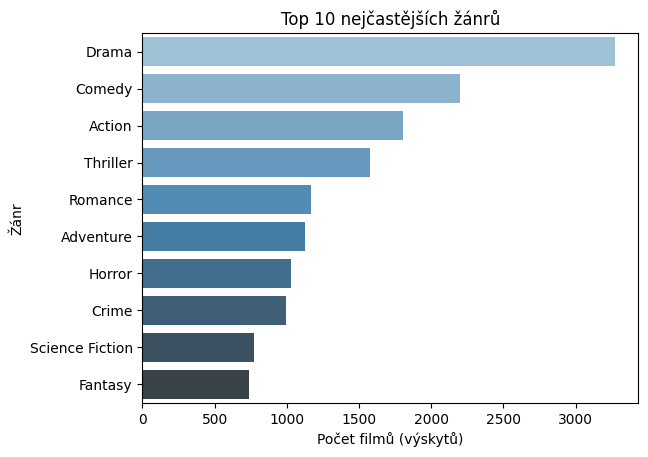

In [28]:
top_10_genres_counts = genres_exploded['genres_list'].value_counts().nlargest(10)

sns.barplot(
    x=top_10_genres_counts.values,
    y=top_10_genres_counts.index,
    palette='Blues_d'
)
plt.title('Top 10 nejčastějších žánrů')
plt.xlabel('Počet filmů (výskytů)')
plt.ylabel('Žánr')
plt.show()

Nejčastější žánry jsou drama a na druhém místě komedie.

## Analýza jazyků

In [22]:
df['languages_list'] = df['spoken_languages'].str.split(', ')

languages_exploded = df.explode('languages_list').reset_index(drop=True)

display(languages_exploded[['title', 'languages_list']])

,title,languages_list
0,Afterburn,English
1,Our Fault,Spanish
2,War of the Worlds,English
3,Hunting Grounds,English
4,The Elixir,Indonesian
...,...,...
11534,Cobra Mission 2,NaN
11535,Earwig and the Witch,Japanese
11536,The Clown,Arabic
11537,True Miracle,Croatian


/tmp/ipython-input-2900557405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


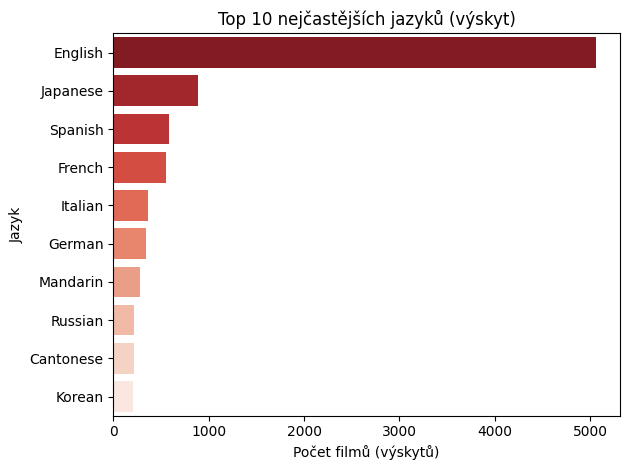

In [23]:
top_10_languages = languages_exploded['languages_list'].value_counts().nlargest(10).index

sns.countplot(
    data=languages_exploded,
    y='languages_list',
    order=top_10_languages,
    palette='Reds_r'
)
plt.title('Top 10 nejčastějších jazyků (výskyt)')
plt.xlabel('Počet filmů (výskytů)')
plt.ylabel('Jazyk')
plt.show()

Filmy s nejvíce jazyky jsou převážně Angličtina a Japonština.

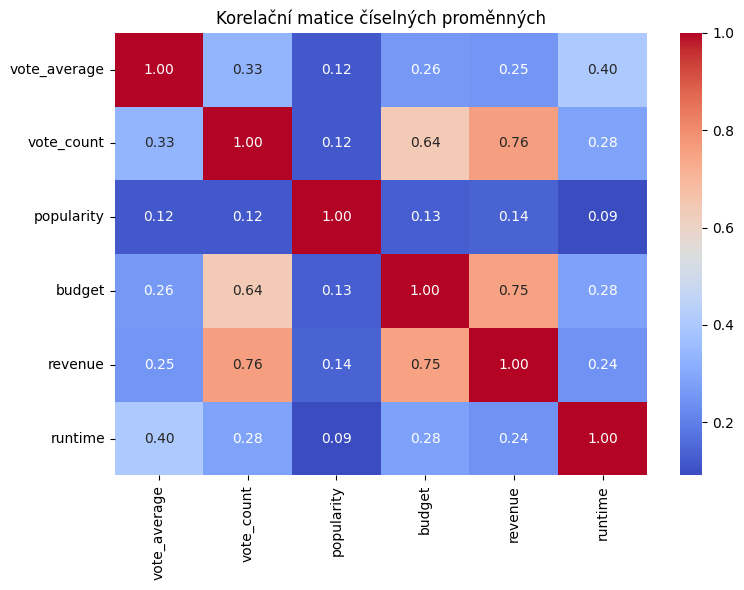

In [14]:
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelační matice číselných proměnných')
plt.show()

Nejsilnější vztah je rozpočet vs tržby (korelace 0.75). Vyšší rozpočet je tedy silně spojen s vyššími tržbami.
Druhou nejsilnější je počet hlasů vs. tržby (korelace 0.76). To znamená, že filmy s velkým počtem hodnocení mají tendenci dosahovat vysokých tržeb. To dává smysl – komerčně úspěšné filmy mají obvykle velkou základnu diváků, kteří se účastní hodnocení.

Naopak délka filmu nemá vliv na hodnocení.